# **MODEL PROJECT: NASH EQUILIBRIA IN OLIGOPOLY MODELS - SUSTAINING COALITION IN COURNOT**

By Emma Knippel, Anna Abildskov and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [1 Introduction](#toc1_) 

* [2 Model description](#toc2_)    

* [3 Analytical solution](#toc3_)    

* [4 Numerical solution](#toc4_)   

* [5 Further analysis](#toc5_) 

* [6: Conclusion](#toc6_) 

## <a id='toc0_'></a>[Setup](#toc0_)

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib inline

# local modules
from modelproject import CournotDuopoly
from modelproject import BertrandDuopoly
from modelproject import Oligopoly

## <a id='toc1_'></a>[1: Introduction](#toc1_)

In economic theory, the study of market structures is fundamental in understanding the dynamics of competition and its implications for firm behavior and market outcomes. Among these structures, duopoly and oligopoly offer rich insights into imperfectly competitive markets. In this project, we delves into the analysis of Cournot and Bertrand duopolies, as well as the implications of their extension into oligopolies.

In the Cournot duopoly model, firms simultaneously choose their output quantity to maximize profits. This strategic interaction leads to a Nash equilibrium where each firm's output quantity is a best response to the other's output quantity. On the other hand, the Bertrand duopoly model assumes firms compete in prices rather than quantities, resulting in a different equilibrium where firms set prices equal to marginal costs, leading to outcomes more akin to a market with perfect competition.

To complement the theoretical framework, we conduct a numerical analysis of Cournot and Bertrand duopolies to explore how changes in parameter values affect equilibrium outcomes. By visualizing these results, we gain a deeper understanding of the sensitivity of Nash equilibria to variations in demand at price zero, $a$, demand elasticity, $b$, and marginal production costs, $c$.

Furthermore, this study extends beyond the duopoly framework to investigate Cournot and Bertrand oligopolies, where multiple firms compete in the market. We examine how the profit dynamics evolve as additional firms enter the market, shedding light on the convergence of Cournot profits towards zero, akin to the Bertrand model or perfect competition, as the number of firms increases.

## <a id='toc2_'></a>[2 Model description](#toc2_)

**2.1 Markets with oligopoly**

The market with oligopoly is set up with a linear inverse demand function and a production fucntion with a constant marginal cost.
$$\begin{aligned} 
p(q) = a - bq\\
C(q) = cq
\end{aligned}$$

**2.2 Cournot Oligopoly**

In the Cournot Oligopoly, we have two similar firms producing two goods: $q_1$ and $q_2$. The total production is $q \equiv q_1 + q_2$. 
Thus, the equations above in he Cournot oligopoly become:
$$\begin{aligned}
&p(q_1,q_2) = a-b(q_1+q_2)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2
\end{aligned}$$
The firms profits of each firm depends not only on their own production, but of the other firm:
$$\begin{aligned} 
\pi_1(q_1,q_2) = p(q_1,q_2)q_1-C(q_1)\\
\pi_2(q_1,q_2) = p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

**2.3 Bertrand Oligopoly**

In the Bertrand Oligopoly, we utilize the demand function (not the inverse) and we keep the production functionn with a constant marginal cost, $C(q)$:
$$\begin{align}
D(p)=\frac{a-p}{b}
\end{align}$$
The main difference in the Bertrand oligopoly is that the firms  each set individual prices, $p_1,p_2$ instead of being price-takers.
We also make the following assumptions:
* If the prices are different, all consumers buy from the firm with the lower price.

* If the firms set the same price, they split the consumers evenly between them.

* The produced quantity follows from the demand function.

Therefore, the firm's sold quantities depend on their individual demand function, $D_1$ and $D_2$:
$$\begin{aligned}
D_1(p_1,p_2)=
\begin{cases} 
D(p_1) & \text{for } p_1 < p_2 \\
\frac{D(p_1)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_1 > p_2 
\end{cases}
\end{aligned}$$

$$\begin{aligned}
D_2(p_1,p_2)=
\begin{cases} 
D(p_2) & \text{for } p_2 < p_1 \\
\frac{D(p_2)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_2 > p_1 
\end{cases}
\end{aligned}$$

This implies the following profit functions:
$$\begin{aligned}
\pi_1(p_1,p_2)=(p_1-c)D_1(p_1,p_2)\\
\pi_2(p_1,p_2)=(p_2-c)D_2(p_1,p_2)
\end{aligned}$$

## <a id='toc3_'></a>[3 Analytical solution](#toc3_)

**3.1 Cournot Analytical Solution**

Each firm attempts to maximize profits given the quantity set by the other firm:
$$\begin{aligned} 
\max_{q_1} p(q_1,q_2)q_1-C(q_1)\\
\max_{q_2} p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

This implicates the following first order condition:
$$\begin{aligned} 
FOC_1 = \frac{∂\pi_1(q_1,q_2)}{∂q_1}=0\\
\Leftrightarrow q_1^*(q_2)=\frac{a-c}{2b}-\frac{1}{2}q_2,
\end{aligned}$$
which is equivalent for the other firm:
$$\begin{aligned}
FOC_2 =  \frac{∂\pi_2(q_1,q_2)}{∂q_2}=0\\
\Leftrightarrow q_2^*(q_1)=\frac{a-c}{2b}-\frac{1}{2}q_1,
\end{aligned}$$

When both firms are best-responding to each other, we achieve the following symmetric Nash Equilibrium:
$$\begin{aligned}
q_1^* = q_2^* = \frac{a-c}{3b}
\end{aligned}$$

**3.2 Bertrand Analytical Solution**

Once again, each firm attempts to maximize profits given the price set by the other firm:
$$\begin{align}
\max_{p_1}(p_1-c)D_1(p_1,p_2)\\
\max_{p_2}(p_2-c)D_2(p_1,p_2)
\end{align}$$

The assumptions made in 2.3 mean that the solution to the Bertrand model is slightly different. Intuitively, it goes through the following four steps:
1. No one will ever set a price below marginal cost, where he/she will lose money with every unit produced. 

2. When one firm sets a price higher than marginal cost, the other firm can always set a slightly lower price and steal the entire market.

3. Because of steps 1 and 2, in equilibrium the two firms compete until the equilibrium price is $p_1 = p_2 = c$.

Therefore, the unique Nash Equilibrium, where both firms are best-responding to the other's price-setting is defined as:
$$\begin{aligned}
p_1^* = p_2^* = c
\end{aligned}$$

Which results in zero profits, just as we observe under perfect competition.

**3.3 Key differences between Cournot and Bertrand**

Comparing the analytical solutions of Cournot and Bertrand duopolies, a fundamental distinction lies in the strategic behavior of firms regarding pricing decisions. In the Cournot model, firms act as quantity setters, determining their output levels based on their competitors' anticipated responses. This leads to a symmetric Nash Equilibrium where firms produce quantities that balance their marginal costs and demand.

Conversely, in the Bertrand model, firms compete as price setters, aiming to maximize profits by setting prices above their marginal costs. However, due to the competitive nature of price competition, firms have an incentive to undercut each other until prices converge to marginal cost, resulting in a unique Nash Equilibrium where prices are equal to marginal costs. 

This distinction in strategic behavior underlines the importance of market power: while Cournot firms end up benefiting profit-wise of their ability to set quantities, Bertrand firms ultimately end up without positive profits, like had it been a perfectly competitive market. 

## <a id='toc4_'></a>[4 Numerical solution](#toc4_)

**SUPER VIGTIGT!!! Husk at give en klar definition af de ydre bounds på a, b og c, for hvis a bliver lavere end c, så går quantity i minus og det må den selvfølgelig ikke**

In [11]:
cournot_dp = CournotDuopoly(20,2,5)
cournot_dp.ne_plot()


interactive(children=(IntSlider(value=35, description='a', max=50, min=20), FloatSlider(value=0.5, description…

Seen above is the graphical solution to the Cournot Duopoly for given a, b, and c values as well as the respective Nash Equilibria the two firms end up given the values. It needs to be noted that the BR is equal for both firms, they will always set their quantities equal given the same values of a, b, and c. This is why it looks as if the graph doesn't change. What actually changes are the values on the axis and not the slope of the BR-functions.

For the values a=20, b=2, and c=5 the equilibrium quantities are (2.5,2.5). 

For higher levels of costs, c, the quantities decrease as it gets more expensive to produce the good. The same goes for the level of b, the higher the value, the lower quantities will be produced. For higher levels of a, the demand is higher and the quantities produces are higher, given the respective c and b values. 

In [3]:
bertrand_dp = BertrandDuopoly(20,2,5)
bertrand_dp.ne_plot()

interactive(children=(IntSlider(value=35, description='a', max=50, min=20), FloatSlider(value=0.5, description…

**Comparison of Cournot and Bertrand Duopoly**
- Why are they different? Quantity vs. price
- What are the quantitites and prices they end up in, respectively. 

## <a id='toc5_'></a>[5 Further analysis](#toc5_)

As shown above, it is possible for firms in a Cournot Duopoly to collude and keep the prices higher than in a makret of complete competition. This model is somewhere in between a monopoly, where one firm has full power over price and quantity in the market, is a price-setter, and complete competition, where no firms can impact price but are all price-takers.

Our initial analysis was to analyse the situation with two firms (Duopoly). A Cournot model can be extanded to an Oligoply, with several firms. In this case, each firm will still have an impact on the price, but the power each firm holds will decrease as the number of firms increase. This happens because the firms set their quantities at the same time as BR to the other firms choice. As the number of firms increases, as long as the demand is the same, the possibility of producing too much and ending in negative profit. Therefor, the firms are faced with a higher level of uncertainty, making it harder to collude and forcing the firms to share the market.

We would like to analyse, for given values of a, b, and c, how much each firms power is decreased as the number of firms increases - when it is no longer possible for the firms to collude. Ergo, we would like to analyse how the Cournot Oligoply models converges towards complete compeition/the Bertrand model, where firms earn zero profit and set their price equal to the marginal costs.

**5.1 Cournot Oligopoly with $N$ firms**

In the Cournot Oligopoly, we have $N$ identical firms producing the same goods: $q_i$. The total production is $q \equiv \sum_{i=1}^{N} q_i$. 
Thus, the equations in he Cournot oligopoly become:
$$\begin{aligned}
&p(q) = a-b(q_1+q_2+...+q_N)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2,...,N
\end{aligned}$$


The profits of each firm depends not only on their own production, but of the other firms as well:
$$\begin{aligned}
\pi_{i}(q_1,q_2,...,g_N) = p(q)q_i-C(q_i)
\end{aligned}$$


The analytical solution is the same as for a Cournot Duopoly, each firm sets the quantity they produce as a BR to the other firms quantity.
$$\begin{aligned}
\max_{q_i} p(q)q_i-C(q_i),  &\;\text{for } q=(q_1+...+q_N)\\
\end{aligned}$$

This implicates the following first order condition for all firms:
$$\begin{aligned}
FOC_i = \frac{∂\pi_i(q_1,...,q_N)}{∂q_i}=0\\
\Leftrightarrow q_i^*(q_1,...,q_N)=\frac{a-c}{2b}-\frac{1}{2}(\sum_{j=1≠i}^{N} q_j),
\end{aligned}$$

The unique equilibrium is therefor still when all firms set their quantities as their BR to each other:
$$\begin{aligned}
q_1^* = q_2^* = ... = q_N^* = \frac{a-c}{(N+1)b}
\end{aligned}$$

As shown in the preliminary analysis, the Cournot Duopoly, i.e. two firms present within the market, has the quantity and price somewhere between a simple monopoly and a market with full competition. For our extension, we are interested in examining how many firms are needed withtin the market for the Cournot Oligopoly to be equal to a market with full competetion in regards to quantity produced and price set, given certain levels of costs. 

**5.2 Bertrand Oligopoly with $N$ firms**

In the bertrand oligolpoly, cf. section 3.2, price is already driven down to marginal cost by the repsective firms' abilities to undercut each other and steal the market. Therefore, adding more firms will leave prices and profits unaffected in the Nash equilibria; it appears the same way as a market with perfect competition from the get-go and remains this way when more firms are added.

Therefore, in our further analysis, the baseline for the market with infinite firms and thus, perfect comptetition, will be our Bertrand Oligipoly. Our goal is to examine how and when the Cournot oligopoly expands its number of firms sufficiently to converge to zero-profits and marginal-cost-prices, becoming more and more similar to the Bertrand oligopoly.


**5.3 Observing profits as $N$ increases**

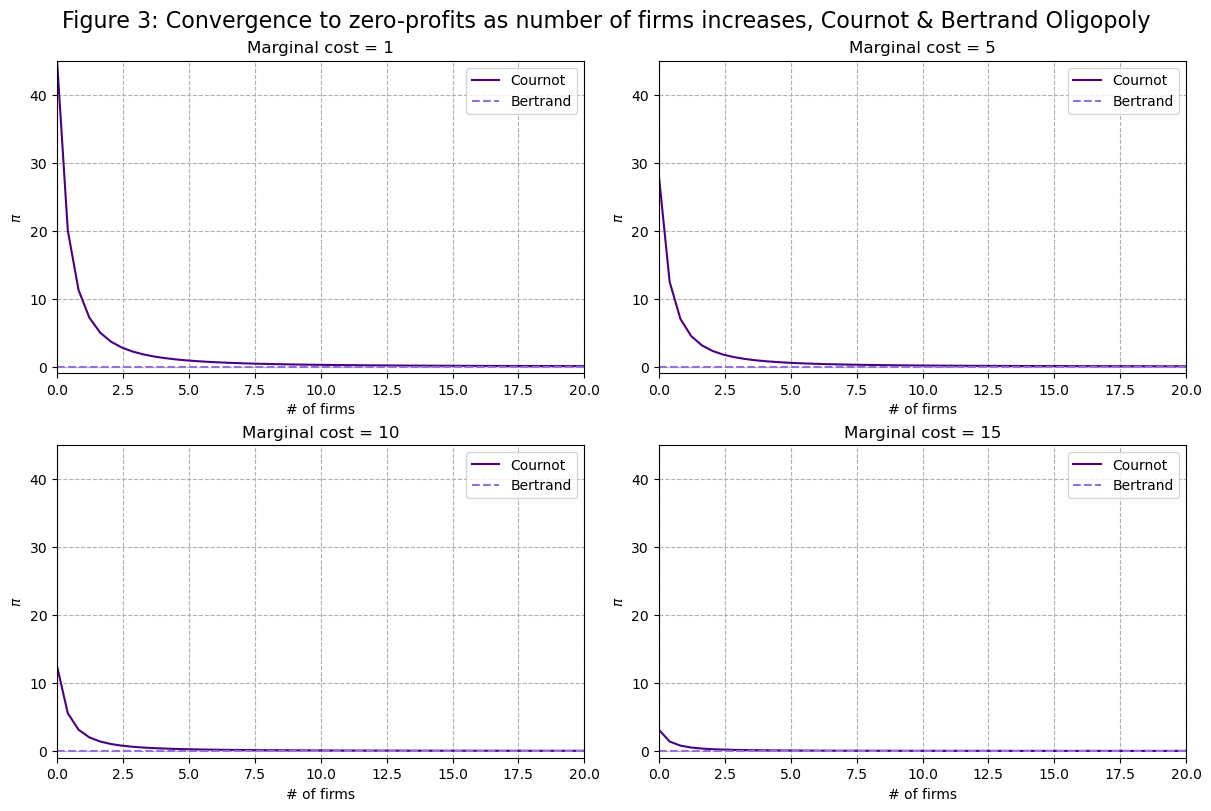

In [4]:
oligpopoly = Oligopoly(10)
oligpopoly.plot_convergence()

## <a id='toc6_'></a>[6 Conclusion](#toc6_)

Add concise conclusion. 